In [166]:
# Generates the Lorenz 1963 and the Lorenz 1996 chaotic systems.

import sys

import matplotlib

import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats
from scipy import linalg

from matplotlib import pyplot as plt

matplotlib.rc("font", size = 15)

# Functions

In [167]:
# Runge Kutta 4.
def RK_4(func, x_0, N = 1e4, h = 0.01):

    N = int(N)

    # Generate time array.
    t = np.arange(0., N * h, h)
    # Weights for each Runge Kutta steps.
    w = np.array( [1, 1, 1, 2] )
    # Runge Kutta steps array.
    X = np.array( [ [0.] * (w.shape[0] + 1) ] * x_0.shape[0] )
    # Results array.
    x = np.array( [ ( [i] + [0.0] * (N - 1) ) for i in x_0 ] )

    # Iterate for every time step.
    for i in range(N - 1):
        # Iterate for each Runge Kutta step.
        for j in range(w.shape[0]):
            # Generate the input variable for the Runge Kutta step.
            x_t = np.array( [ x[k, i] + h * X[k, j] * w[j] / 2
                for k in range( x_0.shape[0] ) ] )
            # Calculate the Runge Kutta step.
            X[:, j + 1] = func(x_t)

        # Generate the result.
        x[:, i + 1] = ( x[:, i] + h / 6 * ( X[:, 1]
            + 2 * X[:, 2] + 2 * X[:, 3] + X[:, 4] ) )

    return x

In [168]:
# Lorenz 1963.
def Lorenz_63(X, s = 10., r = 28., b = 8/3):
    
    dx_dt = s * ( X[1] - X[0] )
    dy_dt = X[0] * ( r - X[2] ) - X[1]
    dz_dt = X[0] * X[1] - b * X[2]

    return dx_dt, dy_dt, dz_dt

# Lorenz 1996.
def Lorenz_96(X, s = 10., F = 8.):

    dX_dt = ( np.roll(X, -1) - np.roll(X, 2) ) * np.roll(X, 1) - X + F

    return dX_dt

In [169]:
# Time series for each variable.
def time_Lorenz( x, t, t_0 = 0, scatter = False, ax = None ):
    
    t_0 = int(t_0)
    x = x[:, t_0:]
    t = t[t_0:]

    if ax is None:
        fig, ax = plt.subplots( x.shape[0] )
        fig.set_facecolor("w")
        if x.shape[0] > 4: h = x.shape[0]
        else: h = 2 * x.shape[0]
        fig.set_size_inches(10, h)
        fig.set_dpi(150)

    for i in range( x.shape[0] ):
        if scatter:
            ax[i].scatter(t, x[i], s = 5,
                color = "tab:blue", marker = "x", linewidth = 1 )
        else:
            ax[i].plot(t, x[i], color = "tab:blue", linewidth = 0.5)
        ax[i].set_xlim(t[0], t[-1])

    return ax

# Compares two runs.
def compare_time(X, t, t_0 = 2e3):

    t_0 = int(t_0)
    X = [ X[0][:, t_0:], X[1][:, t_0:] ]
    t = t[t_0:]

    fig, axes = plt.subplots( X[0].shape[0] )
    fig.set_facecolor("w")
    if X[0].shape[0] > 4: h = X[0].shape[0]
    else: h = 2 * X[0].shape[0]
    fig.set_size_inches(10, h)
    fig.set_dpi(150)

    for i in range( X[0].shape[0] ):
        axes[i].plot(t, X[0][i])
        axes[i].plot(t, X[1][i])
        axes[i].set_xlim(t[0], t[-1])

# Space plot of the first three variables.
def space_Lorenz(x, t):

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    fig.set_facecolor("w")
    fig.set_size_inches(10, 8)
    fig.set_dpi(150)

    ax.plot(x[0], x[1], x[2])

# Plot a Lorenz system.
def plot_Lorenz(x, t):

    # Time series for each variable.
    time_Lorenz(x, t)
    # Space plot of the first three variables.
    space_Lorenz(x, t)

# Plot forecast and analysis.
def plot_analysis( x, y, t, t_0 = 0, ax = None ):
    
    t_0 = int(t_0)
    x = x[:, t_0:]
    y = y[:, t_0:, :]
    t = t[t_0:]

    if ax is None:
        fig, ax = plt.subplots( x.shape[0] )
        fig.set_facecolor("w")
        if x.shape[0] > 4: h = x.shape[0]
        else: h = 2 * x.shape[0]
        fig.set_size_inches(10, h)
        fig.set_dpi(150)

    for i in range( x.shape[0] ):
        #ax[i].scatter(t, x[i], s = 5, 
        #    color = "tab:purple", marker = "o")
        #ax[i].scatter(t, y[i, :, [-1]], s = 5,
        #    color = "tab:red", marker = "s")
        for j in range( x.shape[1] - 1 ):
            ax[i].plot( np.linspace(t[j], t[j + 1], 10), y[i, j + 1],
                color = "tab:red", linewidth = 0.5 )
            ax[i].plot( [t[j + 1], t[j + 1]], [x[i, j + 1], y[i, j + 1, -1]],
                color = "tab:red", linewidth = 0.5 )
            ax[i].set_xlim(t[0], t[-1])

    return ax

In [170]:
# Canadian Quick Covariance method.
def can_cov(x, s = 1):

    # Covariance matrix
    return np.cov( x[:, ::1] )

# Canadian Quick Covariance method.
def plot_can_cov(x, s = 1):

    # Covariance matrix
    a = can_cov(x, s)
    vmin = np.amin(a)
    vmax = np.amax(a)

    # Plot
    fig, ax = plt.subplots()
    fig.set_facecolor("w")
    fig.set_size_inches(5, 5)
    fig.set_dpi(150)

    ax = sns.heatmap( a, vmin = vmin, vmax = vmax, center = 0, 
        cmap = sns.diverging_palette(20, 220, n = 200), square = True )

# Plot Canadian Quick Correlation method.
def plot_can_corr(x, s = 1):

    # Correlation matrix
    a = np.corrcoef( x[:, ::1] )
    vmin = -1
    vmax = -vmin

    # Plot
    fig, ax = plt.subplots()
    fig.set_facecolor("w")
    fig.set_size_inches(5, 5)
    fig.set_dpi(150)

    ax = sns.heatmap( a, vmin = vmin, vmax = vmax, center = 0,
        cmap = sns.diverging_palette(20, 220, n=200), square = True )

In [180]:
# Calculate and plot RMSE.
def RMSE(t, x, x_a, y):
    rmse = [None] * 2
    rmse[0] = np.sqrt( ( (x - y)**2 ) )
    rmse[1] = np.sqrt( ( (x - x_a)**2 ) )

    rmse[0].shape

    # Plot
    fig, ax = plt.subplots(3, 1)
    fig.set_facecolor("w")
    fig.set_size_inches(10, 6)
    fig.set_dpi(150)

    for i in range(len(ax)):
        ax[i].plot(t, rmse[0][i], linewidth = 0.5)
        ax[i].plot(t, rmse[1][i], linewidth = 0.5)
        ax[i].set_xlim(t[0], t[-1])
    
    fig.tight_layout()

In [172]:
# Simulate observations
def gen_obs( x, R = np.diag( [1, 2, 3] ) ):
    for i in range( x.shape[0] ):
        x[i] = stats.norm.rvs(loc = x[i], scale = R[i, i])
    return x

# Code

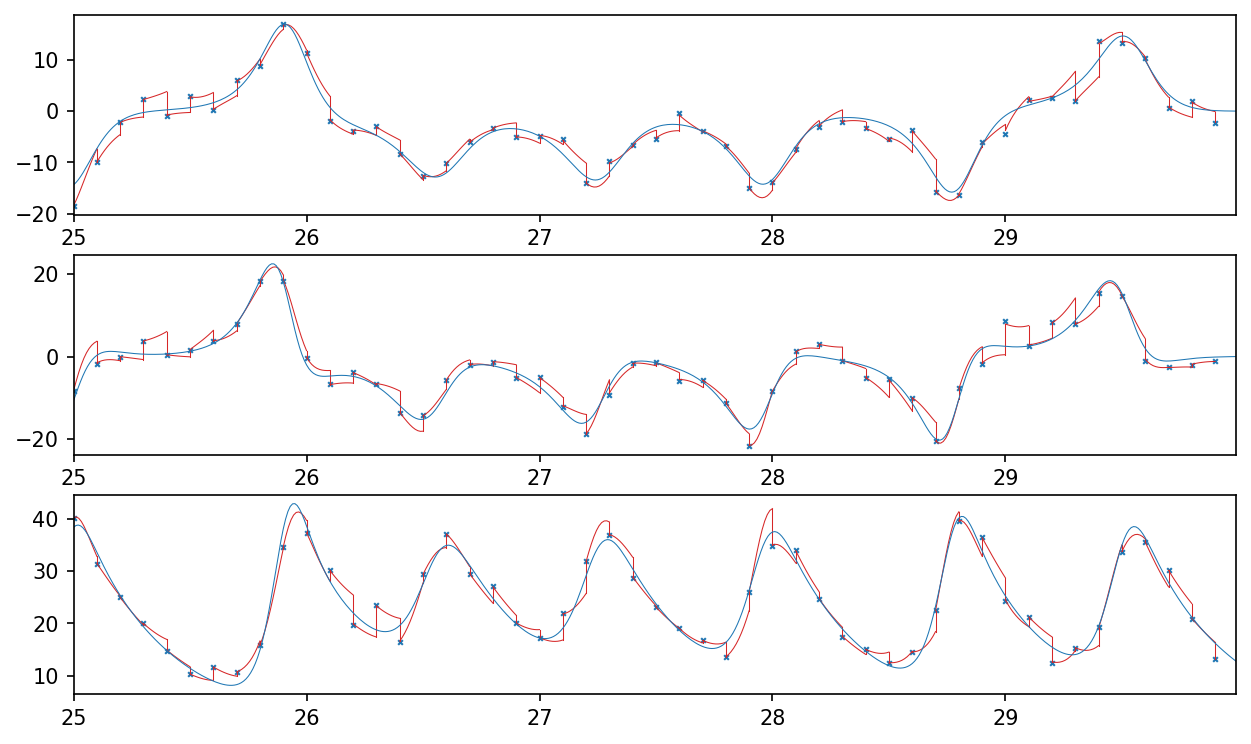

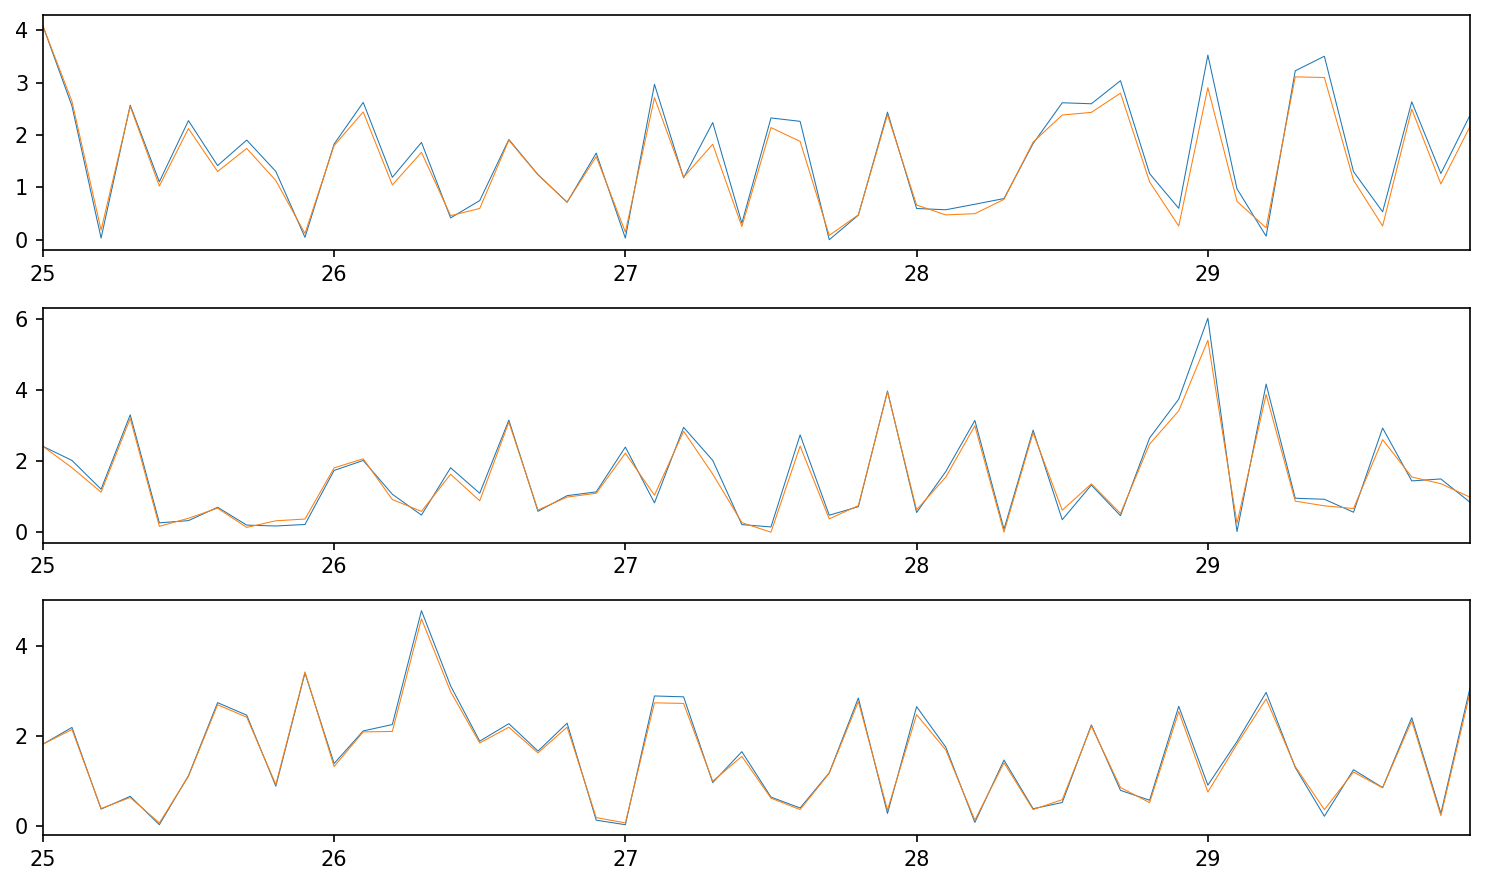

In [181]:

matplotlib.rc("font", size = 10)

# Optimal interpolation.

# Standard deviation for observations.
R = np.diag( [2, 2, 2] )
# Unobserved variables.
n = []
# Observation operator.
H = np.eye(3)
for i in n:
    H[i - 1, i - 1] = 0

# Number of variables.
M = 3
# Number of time steps.
N = 3e3
# Initial conditions.
x_0 = np.array( [ [0.01] * M ] )
# time step.
h = 0.01
# Generate time array.
t = np.arange(0., N * h, h)
# Initial conditions.
x_0 = np.array( [ [0.01] * M ] )
# Observation steps.
o_t = 10

# Simulate observations.
x = RK_4(Lorenz_63, x_0[0], N = N, h = h )
y = x[:, 2500::o_t].copy()
y = gen_obs(y, R = R)

# Covariance Matrix
B = can_cov(y)
# Background.
#x_b = y.copy()
x_b = np.zeros((y.shape[0], y.shape[1], o_t))
# Analysis.
x_a = y.copy()
# Perturbation
p = 1e-5
# Perturbed initial conditions.
x_a[0] += p

for i in range(1, x_a.shape[1]):
    # Forecast
    x_b[:, i ] = RK_4(Lorenz_63, x_a[ :, i - 1 ], N = o_t, h = h )
    x_b[:, i, 0] = x_a[:, i - 1]
    #x_b[ :, [i] ] = x_b[:, [i], [-1] ]
    # Innovation.
    d_ob = y[ :, [i] ] - H @ x_b[:, [i], [-1] ]
    # Total error covariance.
    Gamma = H @ B @ H.T + R
    # Gain.
    K = B @ H.T @ linalg.inv( Gamma )
    # Analysis mean.
    x_a[ :, [i] ] = x_b[:, [i], [-1] ] +  K @ d_ob

ax = plot_analysis(x_a, x_b, t[2500::o_t])
time_Lorenz(y, t[2500::o_t], scatter = True, ax = ax)
time_Lorenz(x, t, t_0 = 2500, ax = ax)

RMSE(t[2500::o_t], x[:, 2500::o_t], x_a, y)

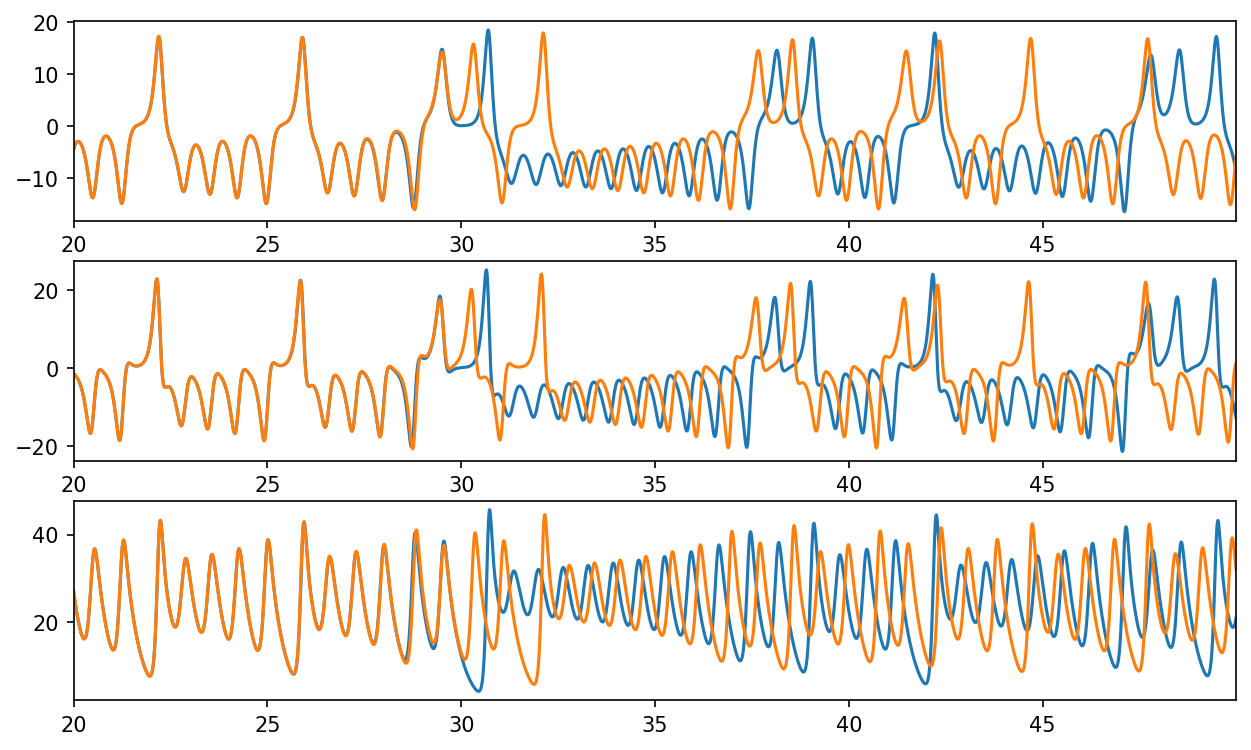

In [174]:
# Lorenz 1963 chaos

# perturbation
#p = 10 ** sys.float_info.min_10_exp
p = 1e-5

# Number of variables.
M = 3
# Number of time steps.
N = 5e3
# Initial conditions.
x_0 = np.array( [0.01] * M )
# Generate time array.
t = np.arange(0., N * h, h)

# Solve by Runge Kutta 4.
x_1 = RK_4(Lorenz_63, x_0, N = N )

# Initial conditions.
x_0[0] += p

# Solve by Runge Kutta 4.
x_2  = RK_4(Lorenz_63, x_0, N = N )

compare_time([x_1, x_2], t)

In [175]:
# Lorenz 1963

# Number of variables.
M = 3
# Initial conditions.
x_0 = np.array( [0.01] * M )

# Solve by Runge Kutta 4.
x, t = RK_4(Lorenz_63, x_0)

# Plot
plot_Lorenz(x, t)

# Canadian Quick Covariance method.
Canadian_cov(x)
Canadian_corr(x)

ValueError: too many values to unpack (expected 2)

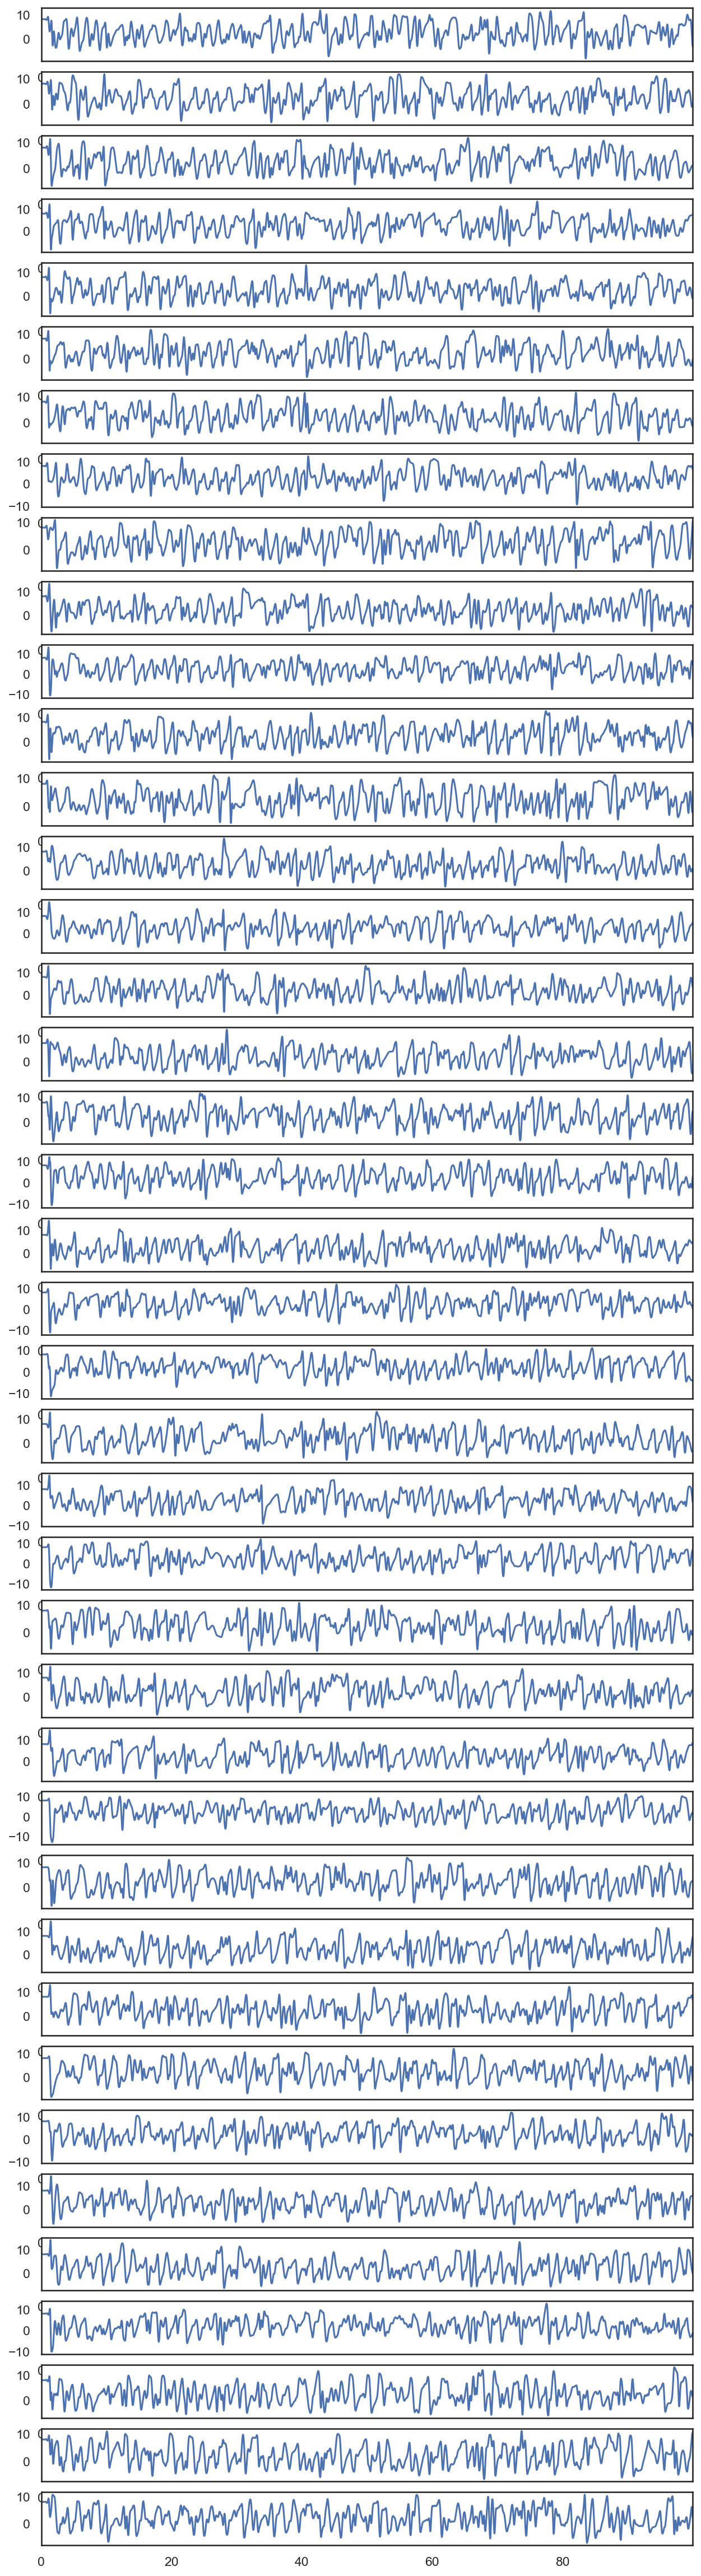

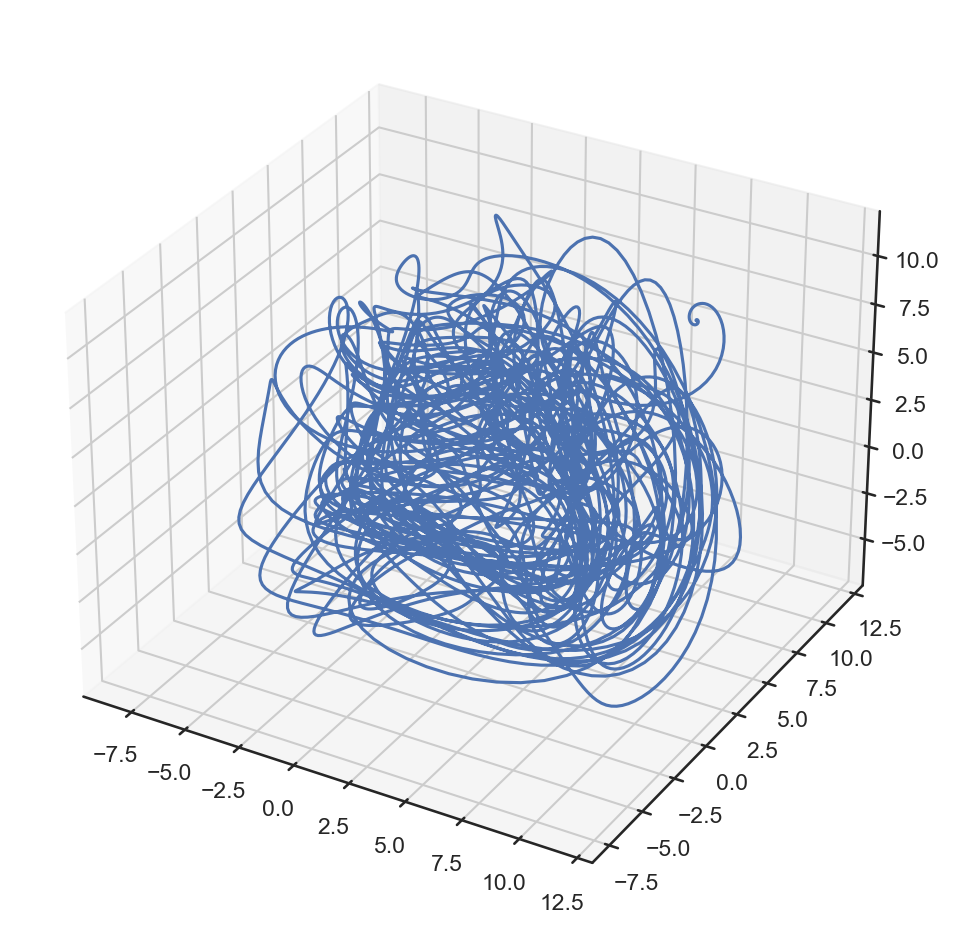

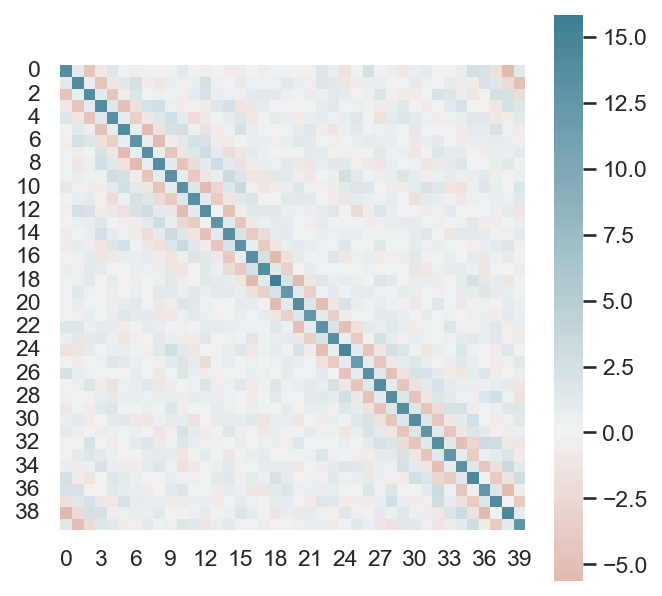

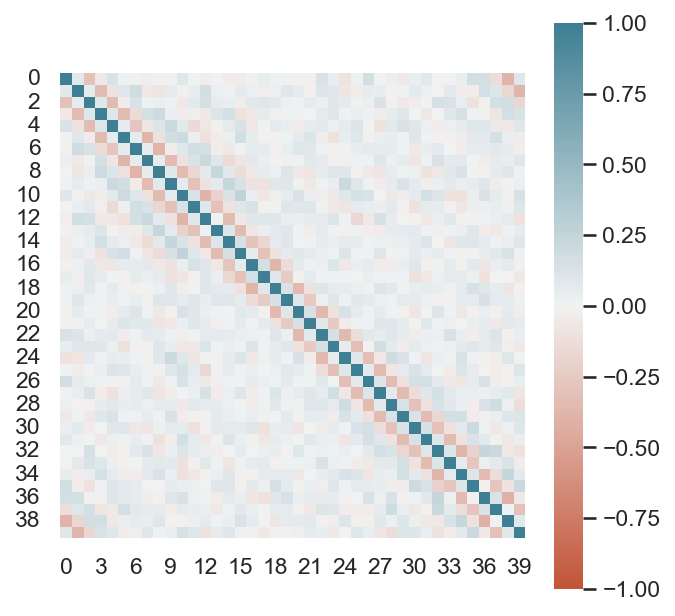

In [ ]:
# Lorenz 1996

# Number of variables.
M = 40
# Constants.
F = 8.

# Initial conditions.
x_0 = np.array( [F] * M )
x_0[0] = x_0[0] + 0.01

# Solve by Runge Kutta 4.
x, t = RK_4(Lorenz_96, x_0)

# Plot
plot_Lorenz(x, t)

# Canadian Quick Covariance method.
Canadian_cov(x)
Canadian_corr(x)